## Grupo:
### Carlos Mauricio Arteaga Bermudez
### Miguel Angel Pablos Perea

## Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


## a). ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

$λ$ es el parametro que indica la taza, cantidad de eventos promedios en una unidad de tiempo

$ λ = \cfrac{1}{μ}$

La (cdf) funcion de distribucion acumulativa es util cuando saber la probabilidad de que ocurra un evento antes de un cierto tiempo, para este caso queremos saber la probabilida de que un pasajero espere menos de 10 minutos por el proximo auto bus

$1 - e^{-\lambda x}$

In [10]:
probabilidad = expon.cdf(1/6, scale=1.5/6)
probabilidad


np.float64(0.486582880967408)

In [11]:

## con numpy
lambda_rate = 4 / 60  # tasa de llegada (autobuses por minuto)
print(f'tasa promedio de llegada de buses en 60 minutos {lambda_rate:.4f}')
t = 10  # tiempo de espera en minutos

# Cálculo de la probabilidad usando la fórmula de la distribución exponencial
probabilidad = 1 - np.exp(-lambda_rate * t)
print(f'La probabilidad de esperar menos de 10 minutos es: {probabilidad:.4f}')

tasa promedio de llegada de buses en 60 minutos 0.0667
La probabilidad de esperar menos de 10 minutos es: 0.4866


In [12]:
## Importando expon de scipy.stats
from scipy.stats import expon

probabilidad = expon.cdf(1/6, scale=1/4)
print(f"La probabilidad de esperar menos de 10 minutos es: {probabilidad:.4f}")



La probabilidad de esperar menos de 10 minutos es: 0.4866


## b). Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

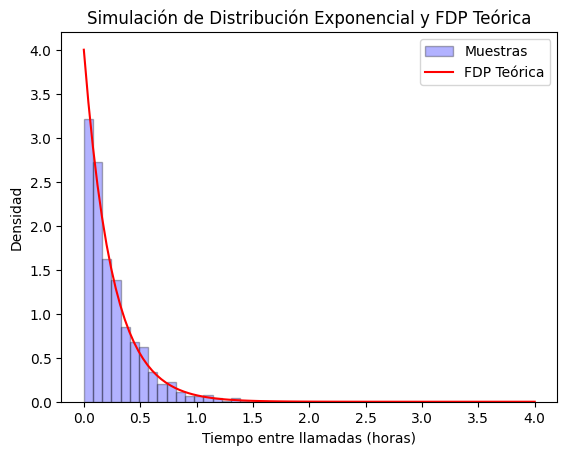

In [15]:
import matplotlib.pyplot as plt

lambda_rate = 4  # llamadas por hora
scale = 1 / lambda_rate  # El inverso de la tasa es el parámetro de escala

# Generar 1000 muestras aleatorias de la distribución exponencial
muestras = expon.rvs(scale=scale, size=1000)


# Configurar los bins del histograma
bins = np.linspace(0, 4, 50)

# Dibujar el histograma de las muestras
plt.hist(muestras, bins=bins, alpha=0.3, label='Muestras', density=True, color='blue',edgecolor='black')

# Generar valores x para la FDP
x = np.linspace(0, 4, 100)

# Calcular la FDP para estos valores x
fdp = expon.pdf(x, scale=scale)

# Dibujar la FDP
plt.plot(x, fdp, 'r-', label='FDP Teórica')

# Añadir títulos y etiquetas
plt.title('Simulación de Distribución Exponencial y FDP Teórica')
plt.xlabel('Tiempo entre llamadas (horas)')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

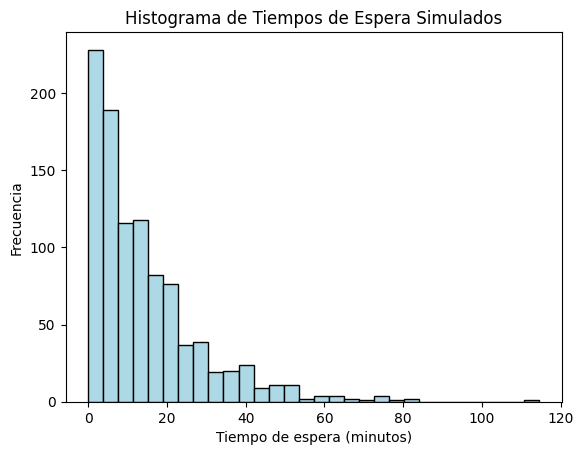

In [91]:
## con numpy 
# Simulación de 1000 tiempos de espera
num_simulaciones = 1000
espera_simulada = np.random.exponential(1 / lambda_rate, num_simulaciones)

# Graficar el histograma de los tiempos simulados
plt.hist(espera_simulada, bins=30, color='lightblue', edgecolor='black')
plt.title('Histograma de Tiempos de Espera Simulados')
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Frecuencia')
plt.show()

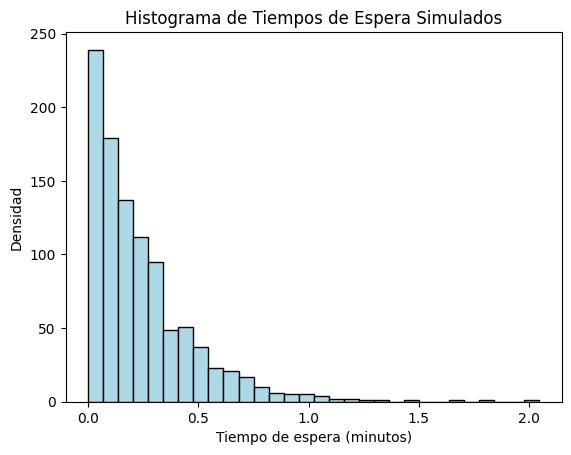

In [92]:
## scipy.stats

lambda_rate = 4  # Autobuses por hora
scale = 1 / lambda_rate  # El inverso de la tasa es el parámetro de escala

# Generar 1000 muestras aleatorias de la distribución exponencial
muestras = expon.rvs(scale=scale, size=1000)
plt.hist(muestras, bins=30, color='lightblue', edgecolor='black')
plt.title('Histograma de Tiempos de Espera Simulados')
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad')
plt.show()

## Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

## a). ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

- La probabilidad de que un estudiante obtenga una puntacion ente [65 y 85] esta dada por la siguiente declaracion.
P(65≤X≤85)=P(X≤85)−P(X≤65)


- Utilizamos CDF para calcular la probabilidad acumulada de que la variable sea x <= 65 y despues de que la variable sea <= 85 y se hace una resta de probabilidades.

In [93]:
from scipy.stats import norm

mu = 70  #media
sigma = 8  # desvest

p_85 = norm.cdf(85, loc=mu, scale=sigma)  # P(X ≤ 85)
p_65 = norm.cdf(65, loc=mu, scale=sigma)  # P(X ≤ 65)

probabilidad = (p_85 - p_65)*100
print(f'La probabilidad de que el estudiante obtenga una puntuacion entre 65 y 85 puntos es de {probabilidad:.2f}%')

La probabilidad de que el estudiante obtenga una puntuacion entre 65 y 85 puntos es de 70.36%


## b). Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

- La puntuacion minima necesaria para estar en el 10% superior habla de el valor minimo para estar sobre el 90% de la distribucion (percentil 90%).
P(x)= 0.90

In [94]:
mu = 70  #media
sigma = 8  # desvest

# Cálculo del percentil 90
percentil_90 = norm.ppf(0.90, loc=mu, scale=sigma) #Aca encontramos el valor del percentil 90% que seria el valor minimo para estar en el 10% superior
print(f'La puntuación mínima para estar en el 10% superior es: {percentil_90:.2f}')

La puntuación mínima para estar en el 10% superior es: 80.25


## c). Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

- Para generar las 500 muestras aleatorias utlizamos la funcion norm.rvs

[np.float64(72.98341167062992), np.float64(72.73828779208152), np.float64(85.83107935385465), np.float64(67.37738247108824), np.float64(72.19468544256192), np.float64(76.32847786757885), np.float64(72.41090189534597), np.float64(68.41047186066683), np.float64(60.61693064816001), np.float64(71.57599792717487), np.float64(77.80274286065638), np.float64(61.534722391169275), np.float64(78.5400609270909), np.float64(57.24035388989184), np.float64(66.6497924205691), np.float64(70.35185902024115), np.float64(84.75815176502431), np.float64(87.84002872280912), np.float64(73.42183567476856), np.float64(72.51303210218343), np.float64(74.88764593326188), np.float64(69.03960127086376), np.float64(76.68750819090819), np.float64(70.69364355139207), np.float64(69.18950160937754), np.float64(70.16475052913766), np.float64(60.67314574456607), np.float64(80.86706988104172), np.float64(81.87255237255667), np.float64(66.58278893028739), np.float64(81.8287761470913), np.float64(65.22841025751529), np.float6

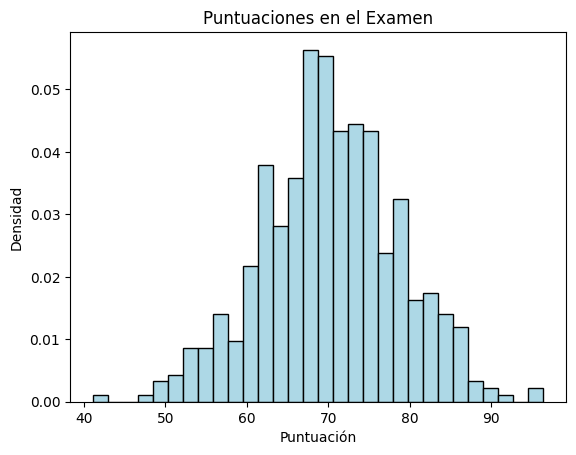

In [95]:
mu = 70  #media
sigma = 8  # desvest
muestras = norm.rvs(loc=mu, scale=sigma, size=500) #Generamos 500 muestras aleatorias
print(list(muestras))

#Histograma 
plt.hist(muestras, bins=30, color='lightblue', edgecolor='black',density=True)
plt.title('Puntuaciones en el Examen')
plt.xlabel('Puntuación')
plt.ylabel('Densidad')
plt.show()

## Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

## a). ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

In [96]:
from scipy.stats import poisson

lambda_p = 2 #media de eventos
k = 3 # numero de eventos a trabajr

probabilidad_3_defectos = poisson.pmf(3,lambda_p )

print(f'la probabilida de encontrar 3 defectos en un metro de tela es de {probabilidad_3_defectos*100:.2f}')



la probabilida de encontrar 3 defectos en un metro de tela es de 18.04


## b). ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?


- Debemos encontar la probabilidad de que P(x) >= 1
- Calculamos la probabilidad complementaria de que no hayan defectos 
- El evento probabilistico seria definido por P(X≥1)=1−P(X=0)

In [97]:
lambda_p = 2 #media de eventos
k = 3 # numero de eventos a trabajr

prob_0_defectos = poisson.pmf(0, lambda_p) #Calculamos la probabilidad de que no hayan eventos defectuosos
print(f'Probabilidad de que hayan 0 defectos {prob_0_defectos:.4f}') 


probabilidad_almenos_1_defecto = 1 - prob_0_defectos # 1 - La probabilidad complementaria
print(f'La probabilidad de que haya al menos un defecto en un metro de tela es {probabilidad_almenos_1_defecto*100:.2f}')



Probabilidad de que hayan 0 defectos 0.1353
La probabilidad de que haya al menos un defecto en un metro de tela es 86.47


In [98]:
# Prueba calculando la probabilidad de que x >= 1 

lambda_p = 2  #media de eventos

# Probabilidad de que haya defectos contador
prob_x_mayor_igual_1 = 0

# Sumar la probabilidad de P(X = 1) hasta un límite (por ejemplo, X = 10)
for k in range(1, 11):
    prob_x_mayor_igual_1 += poisson.pmf(k, lambda_p)
    print(prob_x_mayor_igual_1)

print(f'La probabilidad de que X sea mayor o igual a 1 es: {prob_x_mayor_igual_1:.4f}')

0.2706705664732254
0.5413411329464508
0.7217881772619343
0.8120116994196761
0.8481011082827729
0.8601309112371385
0.8635679977955286
0.8644272694351262
0.8646182186883701
0.8646564085390188
La probabilidad de que X sea mayor o igual a 1 es: 0.8647


## c). Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

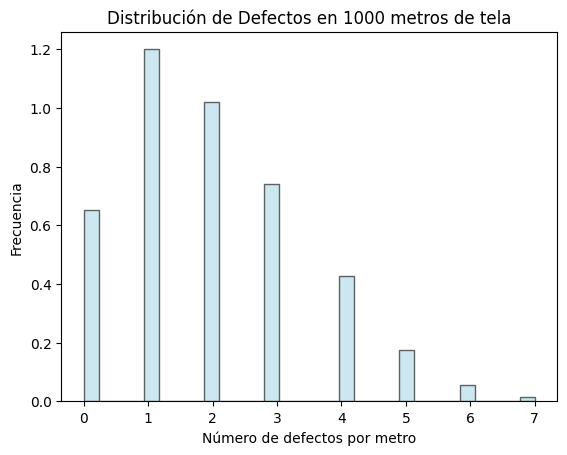

In [99]:
lambda_p = 2  #media de eventos
metros_tela= 1000

Variable_aleatoria = poisson.rvs(lambda_p, size=metros_tela) #Generamos 1000 variables aleatorias

plt.hist(Variable_aleatoria, bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black')
plt.title('Distribución de Defectos en 1000 metros de tela')
plt.xlabel('Número de defectos por metro')
plt.ylabel('Frecuencia')
plt.show()

## Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

## a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?


- El evento probabilistico que queremos determinar es que P(x) > de 1500 Horas, y lo podemos determinar como P(X>1500)=1−P(X≤1500)
- Calculamos la función de distribución acumulativa (CDF) de gamma, y hacemos 1 - CDF


In [100]:
from scipy.stats import gamma

k = 3  # Forma
escala = 500  # Escala

prob_mas_de_1500 = 1 - gamma.cdf(1500, a=k, scale=escala)
print(f'La probabilidad de que la batería dure más de 1500 horas es: {prob_mas_de_1500*100:.4f}')

La probabilidad de que la batería dure más de 1500 horas es: 42.3190


## b). Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

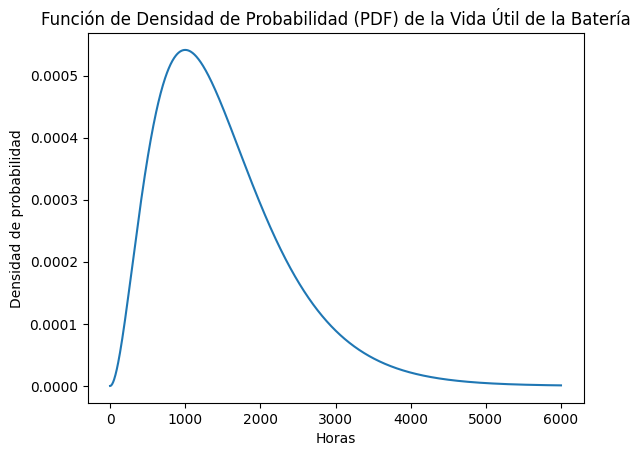

In [101]:
k = 3  # Forma
escala = 500  # Escala

x = np.linspace(0, 6000, 1000) # 1000 puntos entre 0 y 6000 horas

PDF = gamma.pdf(x, a=k, scale=escala)

# Crear la gráfica de la FDP
plt.plot(x, PDF, label='FDP Gamma')
plt.title('Función de Densidad de Probabilidad (PDF) de la Vida Útil de la Batería')
plt.xlabel('Horas')
plt.ylabel('Densidad de probabilidad')
plt.show()

## Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con 
n=30 días y una probabilidad diaria de lluvia de 
p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?

b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

## a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?


In [102]:
from scipy.stats import binom

n = 30 # 30 dias, cantidad de ensayos
p = 0.2 # Probabilidad que llueva en un dia
k = 8 # Cantidad de exitos

Probabilidad_dias_de_lluvia = binom.pmf(k=k, n=n, p=p)

print(f'La probabilidad de que en un mes haya 8 dias de lluvia es de {Probabilidad_dias_de_lluvia*100:.2f}')



La probabilidad de que en un mes haya 8 dias de lluvia es de 11.06


## b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

Lluvias por mes [ 1  5  6  8  7  5  4  9  7  7  6 10]


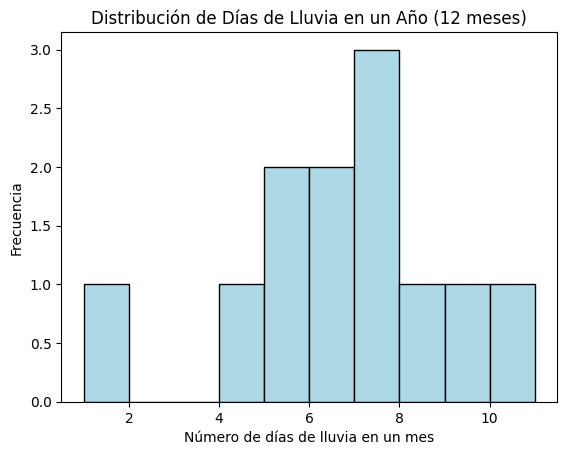

In [103]:
## Simulacion de escenario (Dias de lluvia en 12 meses)
n = 30 # 30 dias, cantidad de ensayos
p = 0.2 # Probabilidad que llueva en un dia
meses = 12

simulacion_lluvia = binom.rvs(n, p, size=meses)
print(f'Lluvias por mes {simulacion_lluvia}')

plt.hist(simulacion_lluvia, bins=range(min(simulacion_lluvia), max(simulacion_lluvia) + 2), color='lightblue', edgecolor='black')
plt.title('Distribución de Días de Lluvia en un Año (12 meses)')
plt.xlabel('Número de días de lluvia en un mes')
plt.ylabel('Frecuencia')
plt.show()

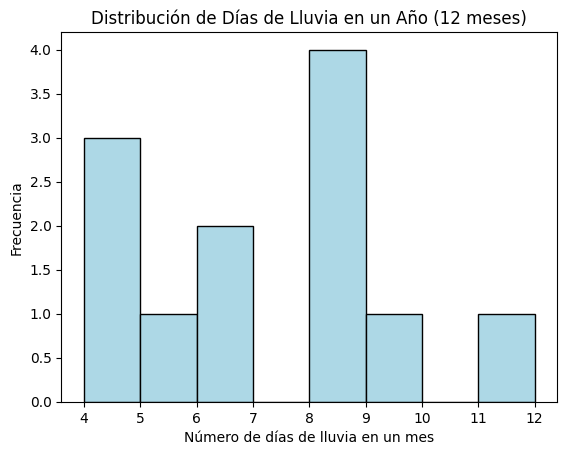

In [104]:
## Simulacion de escenario (Dias de lluvia en 360 dias) comparacion

n_dias_por_ano = 30 * 12  # 12 meses * 30 días por mes
p = 0.2  # probabilidad diaria de lluvia

# Simulación del número de días de lluvia en todo el año
simulacion_lluvia_anual = binom.rvs(n=1, p=p, size=n_dias_por_ano)

# Sumar los días de lluvia por cada mes
dias_lluvia_mensual = np.add.reduceat(simulacion_lluvia_anual, np.arange(0, n_dias_por_ano, 30))

# Representar la distribución de días de lluvia por mes
plt.hist(dias_lluvia_mensual, bins=range(min(dias_lluvia_mensual), max(dias_lluvia_mensual) + 2), color='lightblue', edgecolor='black')
plt.title('Distribución de Días de Lluvia en un Año (12 meses)')
plt.xlabel('Número de días de lluvia en un mes')
plt.ylabel('Frecuencia')
plt.show()


## Ejercicio 6: Control de Calidad en una Fábrica de Bombillas

Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

c) Calcule el valor p de la prueba.

d) ¿Cuál es su conclusión respecto a la nueva máquina?

## a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.


Prueba de hipotesis:

- $H_0$ : La vida media de las bombillas es de 800 horas  $(\mu = 800)$
- $H_1$ : La vida media de las bombillas es diferente de 800 horas  $(\mu \neq 800)$

## b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.


In [105]:
from scipy.stats import norm

mu_0 = 800  # media poblacional
sigma = 50  # desvest poblacional
n = 36  # tamaño de la muestra
x_mu = 785  # media de la muestra
alpha = 0.05  # nivel de significancia

#Calculo del estadistico de prueba 
z = (x_mu - mu_0) / (sigma / np.sqrt(n))
print(f'Estadístico z: {z:.4f}, la media de la muestra esta {z:.4f} desviaciones de la media poblacional') 

z_critical = norm.ppf(1 - alpha / 2, 0, 1)
print(f"Valor crítico z para un nivel de confianza del 95%: {z_critical:.4f}")

margin_error = z_critical * (sigma / np.sqrt(n))
ci_lower = x_mu - margin_error
ci_upper = x_mu + margin_error

print(f"Intervalo de confianza al {(1- alpha)*100}%: ({ci_lower:.2f}, {ci_upper:.2f})")


Estadístico z: -1.8000, la media de la muestra esta -1.8000 desviaciones de la media poblacional
Valor crítico z para un nivel de confianza del 95%: 1.9600
Intervalo de confianza al 95.0%: (768.67, 801.33)


## c) Calcule el valor p de la prueba.


In [106]:
print(z)

p_valor = norm.cdf(z,0,1)
p_valor #Debemos multiplicar por dos porque estamos mirando ambas colas

print(f"p-valor: {p_valor:.4f}")

-1.7999999999999998
p-valor: 0.0359


In [107]:
#2*p_valor < 0.05 #el p valor en ambas colas es mayor al nivel de significancia 

if 2*p_valor < alpha:
    print("Rechazamos la hipótesis nula. La vida media de las bombillas es de 800 horas.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que la nueva máquina está produciendo bombillas con una vida útil diferente a 800 horas.")

No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que la nueva máquina está produciendo bombillas con una vida útil diferente a 800 horas.


## d) ¿Cuál es su conclusión respecto a la nueva máquina?

- el valor del estadístico z es -1.8000 está dentro del rango de [−1.96,1.96] por lo tanto no rechazamos la hipótesis nula
- El intervalo de confianza del 95% es (768.67, 801.33), Como este intervalo incluye el valor de 800 horas (la media bajo la hipótesis nula), no hay evidencia suficiente para afirmar que la nueva máquina está produciendo bombillas con una vida útil diferente de 800 horas.
- El p_valor*2 es 0.0718 y es mayor a 0.05 el nivel de significancia, Entonces no hay evidencia suficiente para rechazar la hipotesis nula. 

## Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

c) Calcule el valor p de la prueba.

d) Interprete los resultados y determine si el medicamento es efectivo.

## a). Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

Prueba de hipotesis:

- $H_0$ : El medicamento no reduce significativamente la presión arterial  $(\mu = 120)$
- $H_1$ : El medicamento reduce significativamente la presión arterial  $(\mu < 120)$

## b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

In [108]:
mu_0 = 120  # media poblacional
sigma = 15  # desvest poblacional
n = 25  # tamaño de la muestra
x_mu = 112  # media de la muestra
alpha = 0.01  # nivel de significancia

#Calculo del estadistico de prueba 
z = (x_mu - mu_0) / (sigma / np.sqrt(n))
print(f'Estadístico z: {z:.4f}, la media de la muestra esta {z:.4f} desviaciones de la media poblacional') 

z_critical = norm.ppf(alpha, 0, 1)
print(f'Valor crítico z para un nivel de confianza del 99%: {z_critical:.4f}')



Estadístico z: -2.6667, la media de la muestra esta -2.6667 desviaciones de la media poblacional
Valor crítico z para un nivel de confianza del 99%: -2.3263


## c) Calcule el valor p de la prueba.


In [109]:
p_valor = norm.cdf(z)
print(f'p-valor: {p_valor:.4f}')

p-valor: 0.0038


In [110]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula. porque el medicamento reduce significativamente la presión arterial")
else:
    print("No rechazamos la hipótesis nula. El medicamento no reduce significativamente la presión arterial")

Rechazamos la hipótesis nula. porque el medicamento reduce significativamente la presión arterial


## d) Interprete los resultados y determine si el medicamento es efectivo.

- la media muestral x_mu = 112 esta a 2.6667 desbiaciones estandar por debajo de la media poblacional mu_0 = 120
- Como el estadistico z -2.6667 es < al z_critical -2.3263 cae en la zona de rechazo y tenemos evidencia suficiente para rechazar la hipótesis nula.
- el p-valor es menor que el nivel de significancia, rechazamos la hipótesis nula. Esto significa que tenemos suficiente evidencia para concluir que el nuevo medicamento reduce significativamente la presión arterial en comparación con la media original de 120 mmHg.


## Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.

a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

## a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.


- $H_0$ : La tasa de llamadas es la misma  $(\lambda = 5)$
- $H_1$ : El nuevo sistema ha cambiado la tasa de llamdas  $(\lambda \neq 120)$

## b) Realice una prueba de hipótesis al nivel de significancia del 5%.


- $ \lambda(esperado) = 5 * 30 $ cantidad de llamadas en 30 minutos
- $ \lambda = 150 $ llamadas en 30 minutos, como lambda es lo suficientemente grande podemos aproximar la distribucion a una normal

Calculo de el z para la distribucion de poisson aproximada $z = \frac{k - \lambda}{\sqrt{\lambda}}$

In [111]:
from scipy.stats import norm

llamadas_esperadas = 5 * 30  # 150 llamadas esperadas en 30 minutos
llamadas_observadas = 180  # Llamadas observadas
sigma = np.sqrt(llamadas_esperadas)  # Desviación estándar esperada

z = (llamadas_observadas - llamadas_esperadas) / sigma
print(f'Estadístico z: {z:.4f}, el valor z esta {z:.4f} desviaciones estandar de la desviacion de la hipotesis nula')

z_critical = norm.ppf(1 - (0.05 / 2))  # Para un nivel de confianza del 95%
print(f'Valor crítico z: {z_critical:.4f}')


Estadístico z: 2.4495, el valor z esta 2.4495 desviaciones estandar de la desviacion de la hipotesis nula
Valor crítico z: 1.9600


## c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

In [112]:
if z < z_critical :
    print('Aceptamos la hipotesis nula y la tasa de llamadas es la misma')
else:
    print('el estadistico z cae en el area de rechazo, y el nuevo sistema cambio la tasa de llamdas')

el estadistico z cae en el area de rechazo, y el nuevo sistema cambio la tasa de llamdas


- Como el valor de z = 2.4495 es mayor que 1.96, esto significa que el valor z está en la región de rechazo. Esto significa que hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado con el nuevo

## Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

## a) Establezca las hipótesis nula y alternativa.


- $H_0$ : La proporción de clientes que prefieren la marca es 40%.
- $H_1$ : La proporción de clientes que prefieren la marca es mayor al 40%.

## b) Realice una prueba de hipótesis al nivel de significancia del 5%.


In [113]:
from scipy.stats import norm

p_0 = 0.40  # Proporción esperada
n = 200  # Tamaño de la muestra
p_hat = 100 / 200  # Proporción observada en la muestra
alpha = 0.05

z = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)
print(f'Estadístico z: {z:.4f} el valor z esta {z:.4f} desviaciones estandar de la desviacion de la hipotesis nula')

z_critical = norm.ppf(1 - alpha)
print(f'Valor crítico z: {z_critical:.4f}')

Estadístico z: 2.8868 el valor z esta 2.8868 desviaciones estandar de la desviacion de la hipotesis nula
Valor crítico z: 1.6449


## c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

In [114]:
p_valor = 1 - norm.cdf(z)
print(f'p-valor: {p_valor:.5f}')



p-valor: 0.00195


In [115]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: la campaña ha aumentado la preferencia de marca.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que la campaña haya sido efectiva.")

Rechazamos la hipótesis nula: la campaña ha aumentado la preferencia de marca.


- El valor del estadistico z  2.8868 es mayor que el z_critical  1.6449 por lo tanto cae en la zona de rechazo de la hipotesis $H_0$ y la campaña  si aumento la preferencia de la marca
- como el p_valor 0.00195 es < a la significancia 0.05, rechazamos la hipotesis nula y la campaña si ha aumentado la preferencia de la marca

## Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

b) Utilice un nivel de significancia del 2% para realizar la prueba.

c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

## a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.


- $H_0$ : La media de las calificaciones es 70 o menos.
- $H_1$ : La media de las calificaciones es mayor que 70.

## b) Utilice un nivel de significancia del 2% para realizar la prueba.


In [116]:
mu_0 = 70  # Media poblacional
sigma = 10  # Desviación estándar poblacional
n = 50  # Tamaño de la muestra
x_mu = 73  # Media de la muestra
alpha= 0.02

z = (x_mu - mu_0) / (sigma / np.sqrt(n))
print(f'Estadístico z: {z:.4f}')

# prueba del z_critical para la cola derecha
z_critical = norm.ppf(1 - alpha)
print(f'Valor crítico z: {z_critical:.4f}')

Estadístico z: 2.1213
Valor crítico z: 2.0537


In [117]:
p_valor = 1 - norm.cdf(z)
print(f'p-valor: {p_valor:.4f}')

p-valor: 0.0169


In [118]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el programa ha tenido un impacto significativo en las calificaciones.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que el programa haya sido efectivo.")

Rechazamos la hipótesis nula: el programa ha tenido un impacto significativo en las calificaciones.


## c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

- Dado que  z 2.121 > z_critical 2.054, el valor de z está en la región de rechazo y por lo tanto el programa educativo ha tenido un impacto en las calificaciones.
- Dado que p_valor 0.0169 es < que alpha 0.02 rechazamos la hipótesis nula y el programa educativo ha tenido un impacto en las calificaciones. 

## Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

- Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
- Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6

a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

c) Interprete los resultados y concluya si el nuevo método es más efectivo.

## a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.


- $H_0$: No hay diferencia, ambos métodos son igualmente efectivos.  $ \mu_1 = \mu_2 $
- $H_1$: Hay una diferencia, uno de los métodos es mas efectivo.  $ \mu_1 \neq \mu_2 $

## b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.


In [119]:
from scipy.stats import t

x1 = 75  # Media del Grupo 1
s1 = 8  # Desviación estándar del Grupo 1
n1 = 15  # Tamaño de la muestra del Grupo 1

x2 = 80  # Media del Grupo 2
s2 = 6  # Desviación estándar del Grupo 2
n2 = 15  # Tamaño de la muestra del Grupo 2

alpha = 0.05

t_stat = (x1 - x2) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print(f'Estadístico t: {t_stat:.4f}')

# calculo de t_critical

alpha = 0.05
df = n1 + n2 - 2  # Grados de libertad
t_critical = t.ppf(1 - alpha / 2, df)
print(f'Valor crítico t: ±{t_critical:.4f}')

Estadístico t: -1.9365
Valor crítico t: ±2.0484


## c) Interprete los resultados y concluya si el nuevo método es más efectivo.

In [120]:
# Cálculo del p-valor para la prueba bilateral
p_valor = 2 * (1 - t.cdf(abs(t_stat), df)) # calculamos la probabilidad en la cola derecha y lo multiplicamos por 2 para hayar ambas colas. 
print(f'p-valor: {p_valor:.4f}')

p-valor: 0.0630


In [121]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el nuevo método es más efectivo.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para concluir que el nuevo método sea más efectivo.")

No rechazamos la hipótesis nula: no hay evidencia suficiente para concluir que el nuevo método sea más efectivo.


## c) Interprete los resultados y concluya si el nuevo método es más efectivo.

- Como el estadistico t -1.9365 esta dentro del rango [−2.048, 2.048] no podemos rechazar la hipotesis nula y no hay suficiente evidencia para concluir que el nuevo método de enseñanza sea más efectivo que el método tradicional.
- ya que el p-valor: 0.0630 es > que alpha 0.05 ni rechazmos $H_0$ porque no hay evidencia suficiente para concluir que el nuevo metodo sea mejor. 

## Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

- Presión arterial media antes: 150 mmHg
- Presión arterial media después: 140 mmHg
- Desviación estándar de las diferencias: 10 mmHg

a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

## a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.


- $H_0$: el programa de ejercicio no ha reducido la presión arterial.  $\mu_d = 0$
- $H_1$: el programa de ejercicio ha reducido la presión arterial $\mu_d > 0$

## b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.


- Calculamos la media de las diferencias haciendo una resta. 150−140=10 mmHg 

In [122]:
from scipy.stats import t

media_diferencias = 10  # Media de las diferencias
desviacion_diferencias = 10  # Desviación estándar de las diferencias
n = 20  # Tamaño de la muestra
alpha = 0.01  # Nivel de significancia


t_stat = media_diferencias / (desviacion_diferencias / np.sqrt(n))
print(f'Estadístico t: {t_stat:.4f}')

t_critical = t.ppf(1 - alpha, n - 1) #con 19 grados de libertad
print(f'Valor crítico t: {t_critical:.4f}')


Estadístico t: 4.4721
Valor crítico t: 2.5395


## c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

In [123]:
p_valor = t.sf(t_stat, n - 1)
print(f'p-valor: {p_valor:.4f}')

p-valor: 0.0001


In [124]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el programa es efectivo para reducir la presión arterial.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que el programa sea efectivo.")

Rechazamos la hipótesis nula: el programa es efectivo para reducir la presión arterial.


- Como el estadístico t 4.4721 es > que el valor t_critical 2.5395, el valor de t cae en la zona de rechazo. y el programa es efectivo para reducir la presion arterial
- Como el valor p_valor 0.0001 es < a alpha 0.01 echazamos la hipótesis nula y el programa es efectivo para reducir la presión arterial.

## Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

- Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
- Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000

a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

## a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.


- $H_0$ No hay diferencia en los salarios promedio entre los departamentos de Ventas y Marketing. $\mu_1 = \mu_2$
- $H_1$ Hay una diferencia en los salarios promedio entre los dos departamentos. $\mu_1 \neq \mu_2$

## b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.


In [125]:
from scipy.stats import t

x1 = 50000  # Media de Ventas
s1 = 5000  # Desviación estándar de Ventas
n1 = 25  # Tamaño de la muestra de Ventas

x2 = 52000  # Media de Marketing
s2 = 6000  # Desviación estándar de Marketing
n2 = 30  # Tamaño de la muestra de Marketing

alpha = 0.05

# Calculamos la varianza combinada 

S_p2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
print(f'Varianza combinada {S_p2}')

t_stat = (x1 - x2) / np.sqrt(S_p2 * (1/n1 + 1/n2))
print(f'Estadístico t: {t_stat:.4f}')

df = n1 + n2 - 2 #Grados de libertad

t_critical = t.ppf(1 - alpha / 2, df)
print(f'Valor crítico t: ±{t_critical:.4f}')



Varianza combinada 31018867.9245283
Estadístico t: -1.3261
Valor crítico t: ±2.0057


## c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

In [127]:
p_valor = 2 * (1 - t.cdf(abs(t_stat), df)) # *2 porque estamos haciendo una prueba bilateral
print(f'p-valor: {p_valor:.4f}')

if p_valor < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los salarios.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que los salarios sean diferentes.")

p-valor: 0.1905
No rechazamos la hipótesis nula: no hay evidencia suficiente de que los salarios sean diferentes.


- como el estadistico t -1.3261 esta dentro del rango [−2.0057, 2.0057] no rechazamos $H_0$
- como el p_valor es > a alpha 0.05 no hay suficiente evidencia para rechazar la hipótesis nula y por lo tanto no hay diferencias no hay diferencia en los salarios promedio entre los departamentos de Ventas y Marketing